0 
 W = 
 [[-0.44823834]
 [-1.07082   ]
 [-0.3122672 ]] b =  [-0.7650256] cost =  15921.642
---------------------------------------------------------------

5000 
 W = 
 [[-0.12953706]
 [-0.7521176 ]
 [ 0.006434  ]] b =  [-0.760992] cost =  3162.384
---------------------------------------------------------------

10000 
 W = 
 [[ 0.01139847]
 [-0.6111823 ]
 [ 0.14736947]] b =  [-0.7591465] cost =  691.145
---------------------------------------------------------------

15000 
 W = 
 [[ 0.07372247]
 [-0.5488582 ]
 [ 0.20969357]] b =  [-0.75827295] cost =  218.45738
---------------------------------------------------------------

20000 
 W = 
 [[ 0.10128283]
 [-0.521298  ]
 [ 0.23725395]] b =  [-0.7578313] cost =  130.69923
---------------------------------------------------------------

25000 
 W = 
 [[ 0.11347009]
 [-0.5091097 ]
 [ 0.2494412 ]] b =  [-0.75753325] cost =  115.60547
---------------------------------------------------------------

30000 
 W = 
 [[ 0.11885864]
 [-0.5037218

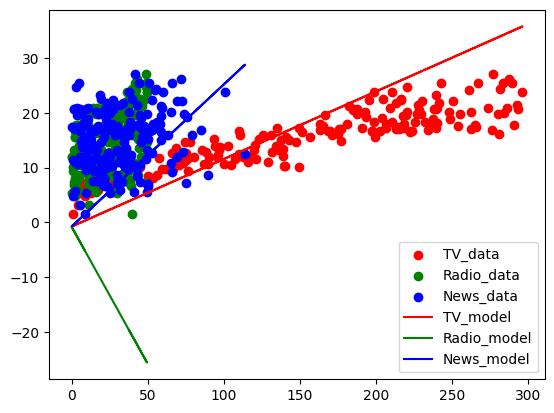

In [2]:
#Gradient descent algorithm

#ipmort library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#original data
ad_table = np.loadtxt('advertising.csv', delimiter = ',', dtype = np.float32)
media_data = ad_table[:, 0:-1] # 0~2 Col
sales_data = ad_table[:,[-1]] # last Col

media_data = np.array(media_data, dtype = np.float32)
sales_data = np.array(sales_data, dtype = np.float32)

#random number
W = tf.Variable(tf.random.normal([3, 1]))   #media_data = [200 * 3], W = [3 * 1]
b = tf.Variable(tf.random.normal([1]))

#Learning Rate
learning_rate = 1e-8

#Define a Gradient Descent without GradientTape
def gradientDescent():
  model = tf.matmul(media_data, W) + b       #H(x1, x2, x3) = w1x1 + w2x2 + w3x3 + b
  cost = tf.reduce_mean(tf.square((model - sales_data)))  #cost(W, b)

#differential process
  W_gradient = tf.reduce_mean((model + b - sales_data) * media_data)
  b_gradient = tf.reduce_mean((model + b - sales_data))

  W_descent = W - learning_rate * W_gradient
  b_descent = b - learning_rate * b_gradient

  W.assign(W_descent)
  b.assign(b_descent)

#Training step = 250000
for step in range(250001):
  gradientDescent()
  model = tf.matmul(media_data, W) + b  #Matrix multiply
  cost = tf.reduce_mean(tf.square(model - sales_data))
  if step % 5000 == 0:  #print every 5000 times
    print(step, '\n', "W = \n",W.numpy(), "b = ",b.numpy(), "cost = ",cost.numpy())
    print("---------------------------------------------------------------\n")


#Original Data to Scatter chart
plt.scatter(media_data[:, 0], sales_data, color = 'red', label = 'TV_data')
plt.scatter(media_data[:, 1], sales_data, color = 'green', label = 'Radio_data')
plt.scatter(media_data[:, 2], sales_data, color = 'blue', label = 'News_data')

#Traning model to Line chart
plt.plot(media_data[:, 0], W[0] * media_data[:, 0] + b, color = 'red', label = 'TV_model')
plt.plot(media_data[:, 1], W[1] * media_data[:, 1] + b, color = 'green', label = 'Radio_model')
plt.plot(media_data[:, 2], W[2] * media_data[:, 2] + b, color = 'blue', label = 'News_model')

plt.legend()
plt.show()


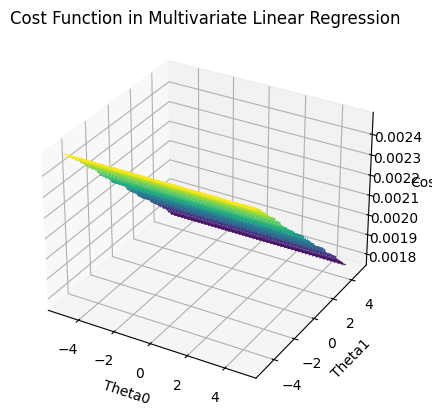

In [3]:
from mpl_toolkits.mplot3d import Axes3D

learning_rate = 1e-6

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

w0 = np.arange(-5, 5, 0.1)
w1 = np.arange(-5, 5, 0.1)
w0, w1 = np.meshgrid(w0, w1)
cost_vals = np.zeros_like(w0)


for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        gradientDescent()
        model = tf.matmul(media_data, W) + b  #Matrix multiply
        cost = tf.reduce_mean(tf.square(model - sales_data))
        cost_vals[i] = cost.numpy()
        cost_vals[j] = cost.numpy()


ax.plot_surface(w0, w1, cost_vals, cmap='viridis')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function in Multivariate Linear Regression')
plt.show()

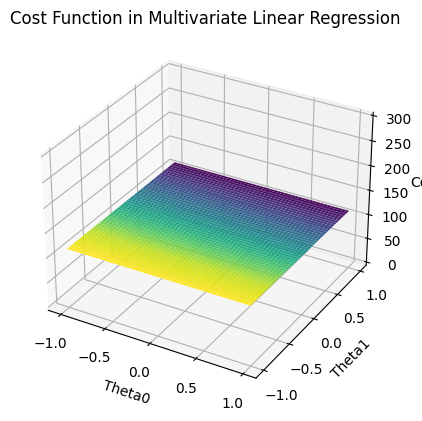

In [4]:
learning_rate = 1e-6

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

w0 = np.arange(-1, 1, 0.01)
w1 = np.arange(-1, 1, 0.01)
w0, w1 = np.meshgrid(w0, w1)
cost_vals = np.zeros_like(w0)

W_val = []
cost_val =[[],[],[]]

for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
      gradientDescent()
      model = tf.matmul(media_data, W) + b  #Matrix multiply
      cost = tf.reduce_mean(tf.square(model - sales_data))
      cost_vals[i][j] = cost.numpy()

ax.set_zlim(0, 300)
ax.plot_surface(w0, w1, cost_vals, cmap='viridis')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function in Multivariate Linear Regression')
plt.show()


In [ ]:
# Test model

tv = float(input("Input TV data "))
radio = float(input("Input Radio data "))
news = float(input("Input News data "))

x1 = np.array([tv, radio, news], dtype = np.float32).reshape(1,3)
y1 = tf.matmul(x1, W) + b
print("sales rate will be  ", format(y1))

Input TV data 180.8
Input Radio data 10.8
Input News data 58.4
sales rate will be   [[28.662004]]


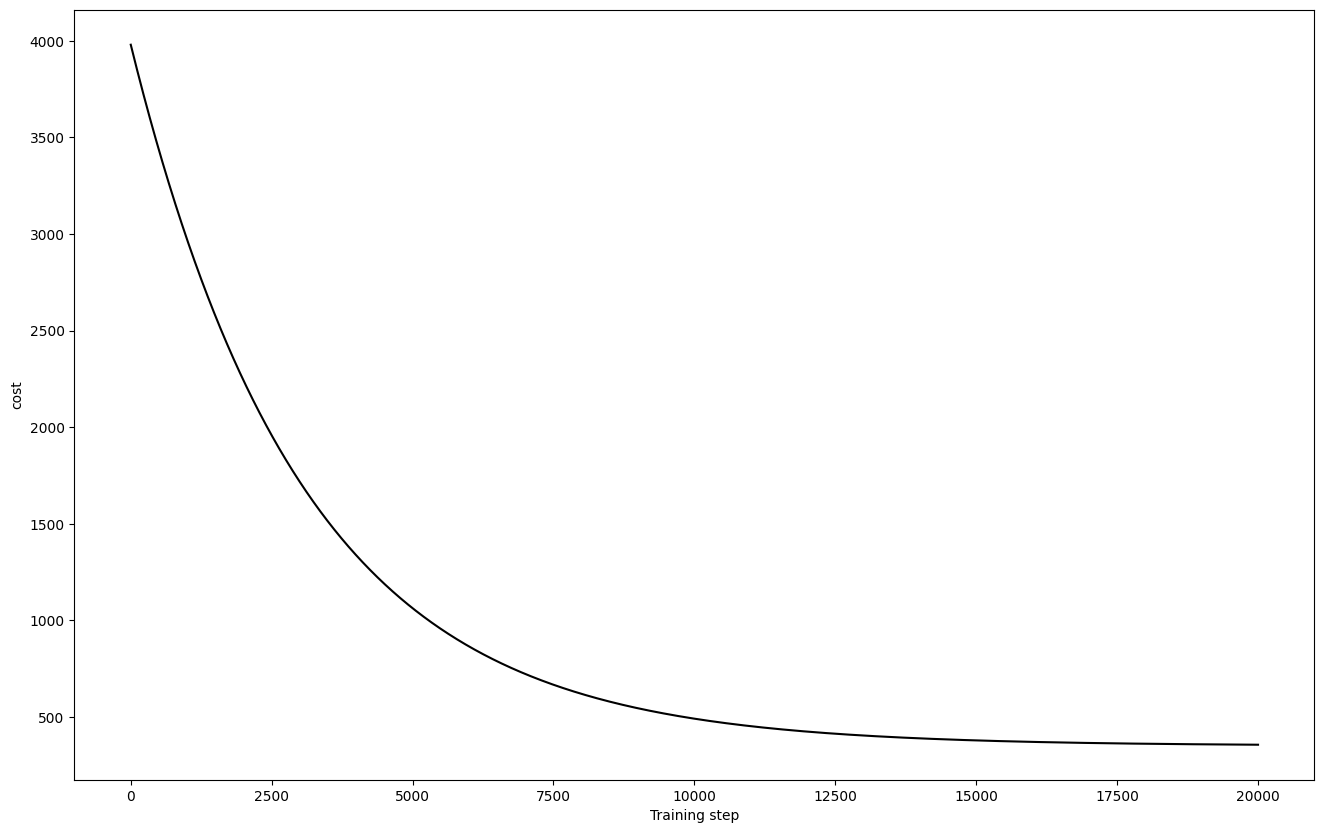

In [ ]:
media_data = ad_table[:, 0:-1] # 0~2 Col
sales_data = ad_table[:,[-1]] # last Col

media_data = np.array(media_data, dtype = np.float32)
sales_data = np.array(sales_data, dtype = np.float32)

#random number
W = tf.Variable(tf.random.normal([3, 1]))   #media_data = [200 * 3], W = [3 * 1]
b = tf.Variable(tf.random.normal([1]))

#Learning Rate
learning_rate = 1e-8

#Define a Gradient Descent without GradientTape
def gradientDescent():
  model = tf.matmul(media_data, W) + b       #H(x1, x2, x3) = w1x1 + w2x2 + w3x3 + b
  cost = tf.reduce_mean(tf.square((model - sales_data)))  #cost(W, b)

#differential process
  W_gradient = tf.reduce_mean((model + b - sales_data) * media_data)
  b_gradient = tf.reduce_mean((model + b - sales_data))

  W_descent = W - learning_rate * W_gradient
  b_descent = b - learning_rate * b_gradient

  W.assign(W_descent)
  b.assign(b_descent)

cost_val = []
#Learning
for step in range(20001):
  gradientDescent()
  model = tf.matmul(media_data, W) + b
  cost = tf.reduce_mean(tf.square(model - sales_data))
  cost_val.append(cost)

#Problem 4. Change in Cost value with Training step

plt.xlabel("Training step")
plt.ylabel("cost")
plt.plot(range(len(cost_val)), cost_val, color = 'black')
plt.show()

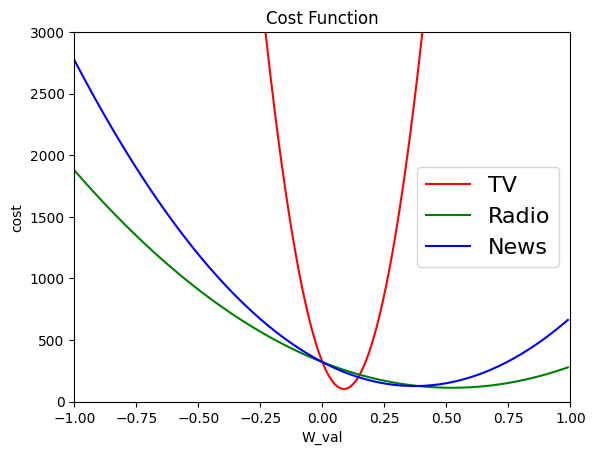

In [ ]:
media_data = ad_table[:, 0:-1] # 0~2 Col
sales_data = ad_table[:,[-1]] # last Col

media_data = np.array(media_data, dtype = np.float32)
sales_data = np.array(sales_data, dtype = np.float32)

#random number
W = tf.Variable(tf.random.normal([3, 1]))   #media_data = [200 * 3], W = [3 * 1]
b = tf.Variable(tf.random.normal([1]))

#Learning Rate
learning_rate = 1e-8

#Define a Gradient Descent without GradientTape
def gradientDescent():
  model = tf.matmul(media_data, W) + b       #H(x1, x2, x3) = w1x1 + w2x2 + w3x3 + b
  cost = tf.reduce_mean(tf.square((model - sales_data)))  #cost(W, b)

#differential process
  W_gradient = tf.reduce_mean((model + b - sales_data) * media_data)
  b_gradient = tf.reduce_mean((model + b - sales_data))

  W_descent = W - learning_rate * W_gradient
  b_descent = b - learning_rate * b_gradient

  W.assign(W_descent)
  b.assign(b_descent)

#Problem 2. Cost function
W_val = []
cost_val =[[],[],[]]

for i in range(-100, 100):   # W range(-1, 1)
  W_curr = i * 0.01
  for j in range(0,3):
    cost_curr = tf.reduce_mean(tf.square(W_curr * media_data[:, j] - sales_data + b))
    cost_val[j].append(cost_curr)
  W_val.append(W_curr)

plt.axis([-1, 1, 0, 3e+3])  #range of graph
plt.title('Cost Function')
plt.xlabel("W_val")
plt.ylabel("cost")

#Cost of TV_data
plt.plot(W_val, cost_val[0], color = 'red', label = 'TV')

#Cost of Radio_data
plt.plot(W_val, cost_val[1], color = 'green', label = 'Radio')

#Cost of News_data
plt.plot(W_val, cost_val[2], color = 'blue', label = 'News')

plt.legend(fontsize = 16)
plt.show()

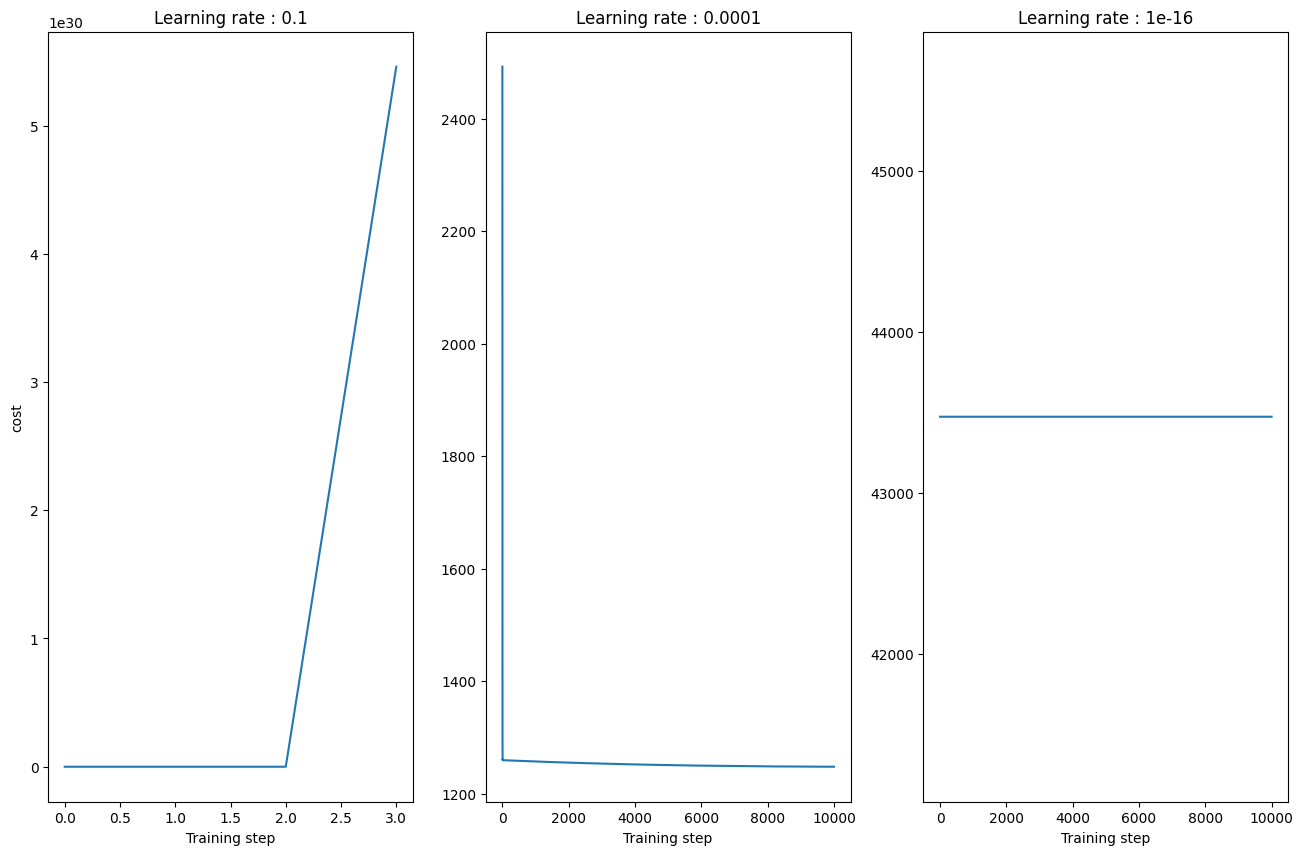

In [ ]:
#Problem 6. Change in Cost value with Learning rate

media_data = ad_table[:, 0:-1] # 0~2 Col
sales_data = ad_table[:,[-1]] # last Col

media_data = np.array(media_data, dtype = np.float32)
sales_data = np.array(sales_data, dtype = np.float32)

#random number
W = tf.Variable(tf.random.normal([3, 1]))   #media_data = [200 * 3], W = [3 * 1]
b = tf.Variable(tf.random.normal([1]))

#Define a Gradient Descent without GradientTape
def gradientDescent():
  model = tf.matmul(media_data, W) + b       #H(x1, x2, x3) = w1x1 + w2x2 + w3x3 + b
  cost = tf.reduce_mean(tf.square((model - sales_data)))  #cost(W, b)

#differential process
  W_gradient = tf.reduce_mean((model + b - sales_data) * media_data)
  b_gradient = tf.reduce_mean((model + b - sales_data))

  W_descent = W - learning_rate * W_gradient
  b_descent = b - learning_rate * b_gradient

  W.assign(W_descent)
  b.assign(b_descent)

cost_val1 = []
cost_val2 = []
cost_val3 = []

# Learning rate = 0.1
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))
for step in range(10001):
  learning_rate = 1e-1
  gradientDescent()
  model = tf.matmul(media_data, W) + b
  cost = tf.reduce_mean(tf.square(model - sales_data))
  cost_val1.append(cost)

# Learning rate = 0.0001
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))
for step in range(10001):
  learning_rate = 1e-4
  gradientDescent()
  model = tf.matmul(media_data, W) + b
  cost = tf.reduce_mean(tf.square(model - sales_data))
  cost_val2.append(cost)

# Learning rate = 1e-16
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))
for step in range(10001):
  learning_rate = 1e-16
  gradientDescent()
  model = tf.matmul(media_data, W) + b
  cost = tf.reduce_mean(tf.square(model - sales_data))
  cost_val3.append(cost)

plt.subplot(1,3,1)
plt.title("Learning rate : 0.1")
plt.xlabel("Training step")
plt.ylabel("cost")
plt.plot(range(len(cost_val1)), cost_val1)

plt.subplot(1,3,2)
plt.title("Learning rate : 0.0001")
plt.xlabel("Training step")
plt.plot(range(len(cost_val2)), cost_val2)

plt.subplot(1,3,3)
plt.title("Learning rate : 1e-16")
plt.xlabel("Training step")
plt.plot(range(len(cost_val3)), cost_val3)
plt.show()

cost  =  296.30515
cost  =  296.2801
cost  =  296.25507
cost  =  296.23
cost  =  296.20493
cost  =  296.1799
cost  =  296.15485
cost  =  296.1298
cost  =  296.10474
cost  =  296.07968
cost  =  296.05463
cost  =  296.02957
cost  =  296.00455
cost  =  295.97952
cost  =  295.95447
cost  =  295.92944
cost  =  295.90442
cost  =  295.8794
cost  =  295.85437
cost  =  295.82938
cost  =  295.80432
cost  =  295.77933
cost  =  295.75427
cost  =  295.72928
cost  =  295.70428
cost  =  295.67923
cost  =  295.65424
cost  =  295.62927
cost  =  295.60422
cost  =  295.57922
cost  =  295.55423
cost  =  295.5292
cost  =  295.5042
cost  =  295.47922
cost  =  295.45422
cost  =  295.42923
cost  =  295.40427
cost  =  295.37927
cost  =  295.3543
cost  =  295.32928
cost  =  295.30432
cost  =  295.27936
cost  =  295.25436
cost  =  295.2294
cost  =  295.20444
cost  =  295.17947
cost  =  295.15448
cost  =  295.12952
cost  =  295.10458
cost  =  295.0796
cost  =  295.05463
cost  =  295.0297
cost  =  295.00473
cost  

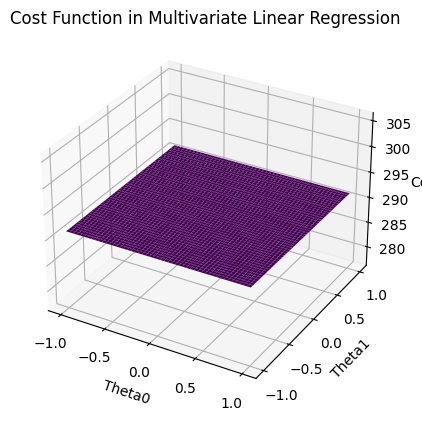

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

media_data = ad_table[:, 0:-1] # 0~2 Col
sales_data = ad_table[:,[-1]] # last Col

media_data = np.array(media_data, dtype = np.float32)
sales_data = np.array(sales_data, dtype = np.float32)

#random number
W = tf.Variable(tf.random.normal([3, 1]))   #media_data = [200 * 3], W = [3 * 1]
b = tf.Variable(tf.random.normal([1]))

#Learning Rate
learning_rate = 1e-8

#Define a Gradient Descent without GradientTape
def gradientDescent():
  model = tf.matmul(media_data, W) + b       #H(x1, x2, x3) = w1x1 + w2x2 + w3x3 + b
  cost = tf.reduce_mean(tf.square((model - sales_data)))  #cost(W, b)

#differential process
  W_gradient = tf.reduce_mean((model + b - sales_data) * media_data)
  b_gradient = tf.reduce_mean((model + b - sales_data))

  W_descent = W - learning_rate * W_gradient
  b_descent = b - learning_rate * b_gradient

  W.assign(W_descent)
  b.assign(b_descent)

#Problem 2. Cost function
W_val = []
cost_val = []

for i in range(-100, 100):   # W range(-1, 1)
  W_curr = i * 0.00001
  cost_curr = tf.reduce_mean(tf.square(W_curr * media_data - sales_data + b))
  cost_val.append(cost_curr)
  W_val.append(W_curr)
  print("cost  = ", cost_curr.numpy())

#plt.axis([-1, 1, 0, 1e+3])  #range of graph
#plt.title('Cost Function')
#plt.xlabel("W_val")
#plt.ylabel("cost")

#plt.plot(W_val, cost_val, color = 'blue', label = 'cost')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

w0 = np.linspace(-1, 1, 1000)
w1 = np.linspace(-1, 1, 1000)
w0, w1 = np.meshgrid(w0, w1)
cost_vals = np.zeros_like(w0)

for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        cost_vals[i, j] = cost_curr.numpy()


ax.plot_surface(w0, w1, cost_vals, cmap='viridis')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function in Multivariate Linear Regression')

# rstride=4, cstride=4, alpha=0.4, cmap=cm.jet


plt.show()


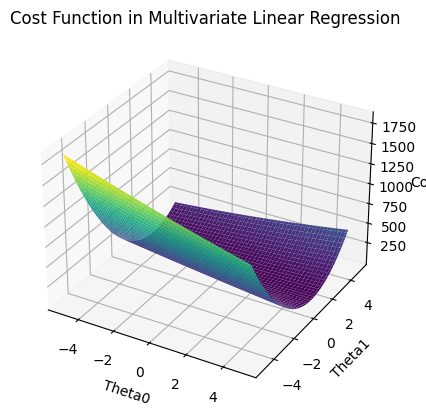

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 랜덤한 데이터 생성 (임의의 예시)
np.random.seed(0)
X1 = np.random.rand(100) * 10
X2 = np.random.rand(100) * 5
Y = 2 * X1 + 3 * X2 + np.random.randn(100)  # 다중 선형 회귀 모델 예시

# 비용 함수 계산
def cost_function(X1, X2, Y, theta0, theta1, theta2):
    predictions = theta0 + theta1 * X1 + theta2 * X2
    error = predictions - Y
    cost = np.mean(error**2)
    return cost

# 그래프를 그릴 비용 함수의 입력 범위 설정
theta0_vals = np.linspace(-5, 5, 100)
theta1_vals = np.linspace(-5, 5, 100)
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
cost_vals = np.zeros_like(theta0_vals)

# 비용 함수 값 계산
for i in range(theta0_vals.shape[0]):
    for j in range(theta0_vals.shape[1]):
        cost_vals[i, j] = cost_function(X1, X2, Y, theta0_vals[i, j], theta1_vals[i, j], 3.0) # 여기서 3.0은 theta2의 예시 값

# 3D 그래프로 비용 함수 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, cost_vals, cmap='viridis')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function in Multivariate Linear Regression')
plt.show()
